# Hormone Workshop



Today we will look at how computers can help when analysing and comparing large datasets, and can provide extra analysis that we are unable to do by hand.

In this workshop we are trying to improve the diagnostic outcome of patients with disease by looking at data from patients, comparing them to a control dataset, and seeing if we can use computers to help us understand the data and pull out significant factors which may not have been obvious previously.

By looking at the dataset, we will also consider if there are any other data points which may be useful in diagnosis and how this may reflect on results.

In this workshop we will cover:

- how to handle datasets
- data analysis using python
- data visualisation
- outliers and anomalies
- data classification
- considering the effect of data on the results
- consider patient outcomes and perspectives
- uncertainty and likelihood of disease

# Task 1 

You should have already analysed the patient and control datasets using the deck of cards, and made a note of what the key differences were between the two datasets. Imagine if you had to analyse all the data by hand for the whole of the NHS?! That would take far too long.

We can use computers to quickly analyse the data and plot graphs so it's presented in a way that's easy to understand.
There are many ways to do this, but here we will use Python code....

**Step 1:** Open the excel spreadsheet which contains all the participant data, so you are familiar with what it looks like. To open the file, 
go to File>Documents>Hormone Workshop> Participant Data.csv

This file should contain all the information that you previously saw on the individual cards, for each patient.

**Step 2:** Now we are going to plot this data using Python code, so it is easier to visualise and interpret the data using graphs.

Whenever we start coding, we have to import certain packages that allow us to plot graphs such as **numpy, pandas **and** **matplotlib.pyplot**. We can also set up some things at the very beginning to save us time later, such as defining the plot colours of the graphs, which is what we have done here in the code below with **plot_color** and **colorplot**.

**Run the below section of code...**

In [170]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
import sklearn
from sklearn.svm import SVC
plot_color = np.array([[166, 206, 227], [31, 120, 180], [178, 223, 138], 
                       [51, 160, 44], [251, 154, 153], [227, 26, 28], 
                       [253, 191, 111], [255, 127, 0], [202, 178, 214], 
                       [106, 61, 154]]) / 256
colorplot = np.array([[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], 
                      [0.9290, 0.6940, 0.1250], [0.3010, 0.7450, 0.9330], 
                      [0.6350, 0.0780, 0.1840]])

**Step 3:** To plot the graphs, we need to load in the data file "Participant Data.csv" first, and define each column of data within the code.

The first line of the code below loads the excel file containing the data.

*Task:* Where it says "ENTER DATA FILE", insert the name of the excel file containing the data ('Participant Data.csv').
Look at how we have assigned the data from the spreadsheet to a corresponding name.

**Run this section of code...**


In [171]:
Participant_data = pd.read_csv('Participant Data.csv', skiprows=1).to_numpy()

#Here we are assigning each column of data a name we can use in the code, where [row:column]
#For example; participant = [:, 0] = 1st row in the spreadsheet, where ':' means'all rows'

participant = Participant_data[:, 0]
condition = Participant_data[:, 1]
sex = Participant_data[:, 2]
smoker = Participant_data[:, 3]
age = Participant_data[:, 4]
height = Participant_data[:, 5]
BMI = Participant_data[:, 6]
hormone = Participant_data[:, 7]

**Step 4:** The next section of code will plot histograms showing the distribution for each column of data:
- Male and Female 
- Smokers
- Age 
- Height
- BMI
- 8am Hormone

Control and patient data will be plotted on the same graph.

By using coding we can very quickly plot data and see results! Way quicker than doing it by hand!

**Run this section of code...**


In [172]:
# Count number of controls and patients
Controls = np.where(condition == 0)[0]
NC = len(Controls)
Patients = np.where(condition == 1)[0]
NP = len(Patients)

# Compare controls and patients
plt.figure()
plt.gcf().set_facecolor('w')

#Plots Sex - Male and Female
plt.subplot(2, 3, 1)
plt.title('sex')
plt.bar(1, len(np.where((condition == 0) & (sex == 0))[0]), color=plot_color[3, :], alpha=0.6)
plt.bar(4, len(np.where((condition == 0) & (sex == 1))[0]), color=plot_color[3, :], alpha=0.6)
plt.bar(2, len(np.where((condition == 0) & (sex == 0))[0]), color=plot_color[-1, :], alpha=0.6)
plt.bar(5, len(np.where((condition == 1) & (sex == 1))[0]), color=plot_color[-1, :], alpha=0.6)
plt.xticks([1.5, 4.5], ['Female', 'Male'])
plt.ylim([0, 26])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots smokers
plt.subplot(2, 3, 2)
plt.title('smoker')
plt.bar(1, len(np.where((condition == 0) & (smoker == 1))[0]), color=plot_color[3, :], alpha=0.6)
plt.bar(2, len(np.where((condition == 1) & (smoker == 1))[0]), color=plot_color[-1, :], alpha=0.6)
plt.ylim([0, 26])
plt.ylabel('')
plt.box(on=True)

#Plots Age
plt.subplot(2, 3, 3)
plt.title('age')
plt.hist(age[Controls], color=plot_color[3, :], bins=np.arange(20, 85, 5), alpha=0.6)
plt.hist(age[Patients], color=plot_color[-1, :], bins=np.arange(20, 85, 5), alpha=0.6)
plt.ylim([0, 10])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots Height
plt.subplot(2, 3, 4)
plt.title('height')
plt.hist(height[Controls], color=plot_color[3, :], bins=10, alpha=0.6)
plt.hist(height[Patients], color=plot_color[-1, :], bins=10, alpha=0.6)
plt.ylim([0, 10])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots BMI
plt.subplot(2, 3, 5)
plt.title('BMI')
plt.hist(BMI[Controls], color=plot_color[3, :], bins=np.arange(17, 33), alpha=0.6)
plt.hist(BMI[Patients], color=plot_color[-1, :], bins=np.arange(17, 33), alpha=0.6)
plt.ylim([0, 20])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots 8am Hormone
plt.subplot(2, 3, 6)
plt.title('')
hC, _, _ = plt.hist(hormone[Controls], color=plot_color[3, :], bins=np.arange(0, 301, 20), alpha=0.6)
hP, _, _ = plt.hist(hormone[Patients], color=plot_color[-1, :], bins=np.arange(0, 301, 20), alpha=0.6)
plt.ylim([0, 15])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots legend showing the control and patient colours
a = plt.axes([0, 0, 1, 1], visible= False)
plt.tight_layout()
plt.legend([hC, hP], ['Controls', 'Patients'], loc='upper center', frameon=False)

#Shows all graphs
plt.show()



<IPython.core.display.Javascript object>

C:\Users\delaneya\AppData\Local\Temp\ipykernel_2940\2701650196.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\delaneya\AppData\Local\Temp\ipykernel_2940\2701650196.py:71: UserWarning: Legend does not support handles for ndarray instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([hC, hP], ['Controls', 'Patients'], loc='upper center', frameon=False)


**Step 5:** Congratulations! You've just plotted all the participants data ready for analysis!

However, it looks like some of the axis labels might be missing.

*Task:* Identify what you think is missing then go back to the section of code above and add in the axis labels.


**Step 6:** By plotting the data as histograms, we can visualise the data and easily see that the biggest differences between the control and patient groups are in **BMI** and **8am hormone**.

Okay, now we know this. But if we look closer at this data can we learn more? 
Are BMI and 8am hormone related in any way? Do they influence each other? 

If we plot **BMI** v **8am hormone**, maybe we can find out.

**Run this section of code...**


<IPython.core.display.Javascript object>


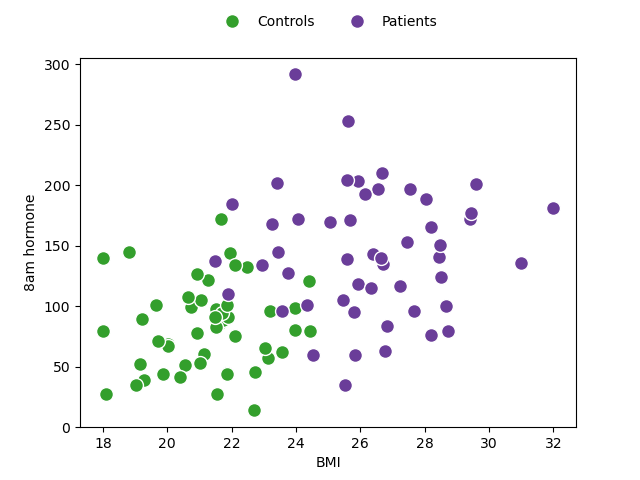

In [173]:
#Plot BMI v 8am hormone 
plt.figure()
plt.gca().set_facecolor('w')
hC1 = plt.plot(BMI[Controls], hormone[Controls], 'o', markersize=10, 
                markerfacecolor=plot_color[3], markeredgecolor='w')
hP1 = plt.plot(BMI[Patients], hormone[Patients], 'o', markersize=10, 
              markerfacecolor=plot_color[-1], markeredgecolor='w')
plt.xlabel('BMI')
plt.ylabel('8am hormone')
plt.box(True)

plt.legend([hC1[0], hP1[0]], ['Controls', 'Patients'], 
           loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           ncol=2, frameon=False)
plt.show()



It looks like only the control data is being plotted

**Task:** Plot the patient data on the scatter graph.

Look at the section of code below. 'hC1' plots the control data. 'hP1' is the patient data.

To plot the patient data, you need to fill in each parameter of hP1 = plt.plot(), where each parameter means:

plt.plot(x data, y data, shape of data point, size of data point, colour of data point, colour of the edge of data point)

(The colour purple is the number '-1')

**Step 7:** Now you have plotted the patient data, what do you think of this plot? How would you describe the data? Are the clusters distinct? Would you confidently be able to say a participant has the disease or not? Discuss this with the class and see how we could improve the plot.

# Task 2

In this task we will look at what steps we can take to improve the outcomes of the analysis, so we can confidently distinguish between control participants and patients, so Doctors may use this information when deciding if a patient might have the disease or not.

One step we can take is to improve the actual data we have.

BMI is a fixed value, and while a persons weight may change over weeks or months, it won't change in the short term.
However, the hormone value was taken at 8am, but hormones levels change over the course of the day, so the value at 8am may not be representative of the patients actual hormone levels.

In this case we can improve our data by looking at the hormone levels over 24 hours, rather than at one time point.

**Step 8:** We will pick 4 examples to look at: 2 'normal' data points, and 2 outliers.

Run the code below to see which data points we will use

**Run this section of code...**

<IPython.core.display.Javascript object>


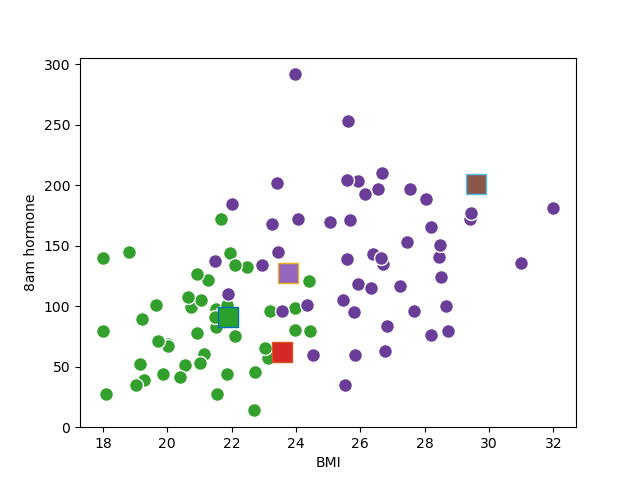

In [174]:
Hormone_profiles = pd.read_csv('Hormone_profiles [3].csv', skiprows=1).to_numpy()
profiles = Hormone_profiles[:, 1:]


partC = [22, 12]
partP = [66, 71]  # partP = [50, 71]

plt.figure()
plt.gcf().set_facecolor('w')

hC1 = plt.plot(BMI[Controls], hormone[Controls], 'o', markersize=10, markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP1 = plt.plot(BMI[Patients], hormone[Patients], 'o', markersize=10, markerfacecolor=plot_color[-1, :], markeredgecolor='w')

sel = partC + partP

for i in range(len(sel)):
    plt.plot(BMI[sel[i]], hormone[sel[i]], 's', markersize=15, markeredgecolor=colorplot[i, :], linewidth=2.5)

plt.xlabel('BMI')
plt.ylabel('8am hormone')
plt.box(True)

**Step 9:** We will now plot the 24 hour hormone profiles for the 4 data points; 2 control and 2 patient.

**Run this section of code...**

<IPython.core.display.Javascript object>


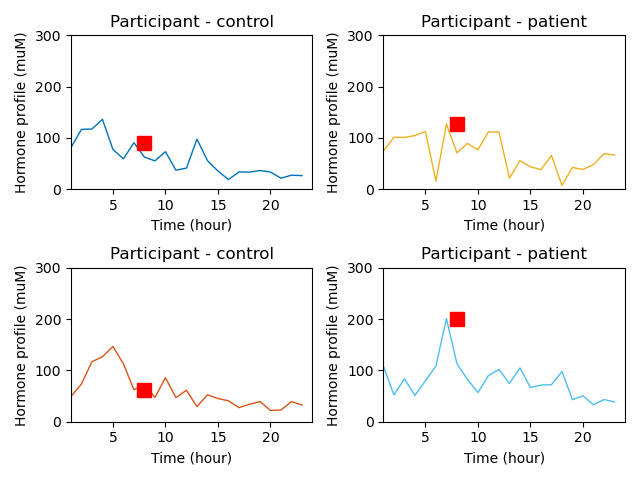

In [177]:
plt.figure()

plt.subplot(2, 2, 1)

plt.title('Participant - control')
plt.plot(profiles[partC[0], :], linewidth=1, color=colorplot[0, :])
plt.plot(8, profiles[partC[0], 7], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile (muM)')
plt.box(True)

plt.subplot(2, 2, 2)

plt.title('Participant - patient')
plt.plot(profiles[partP[0], :], linewidth=1, color=colorplot[2, :])
plt.plot(8, profiles[partP[0], 7], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile (muM)')
plt.box(True)

plt.subplot(2, 2, 3)

plt.title('Participant - control')
plt.plot(profiles[partC[1], :], linewidth=1, color=colorplot[1, :])
plt.plot(8, profiles[partC[1], 7], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile (muM)')
plt.box(True)

plt.subplot(2, 2, 4)

plt.title('Participant - patient')
plt.plot(profiles[partP[1], :], linewidth=1, color=colorplot[3, :])
plt.plot(8, profiles[partP[1], 7], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile (muM)')
plt.box(True)
plt.tight_layout()
#plt.legend([hC1, hP1], ['Controls', 'Patients'], orientation='horizontal', bbox_to_anchor=(0.5, 1.05), loc='upper center', frameon=False)
plt.show()



**Step 10:** Look at these plots, what do they tell you? Compare them to eachother and their corresponding data point on the graph above. Discuss with the class what this might mean


# Task 3


To analyse and compare the 24 hour hormone profiles, we want to know what the total hormone level is over the whole day. That way we can reliably compare participant hormone levels.

**Step 11:** To find out the total hormone level, we measure the *area under the curve*.
To do this we sum all the data points over the 24 hours.

The code below calculates the area under the curve for each graph, but does not print the values.

To print the values add "print("Area under the curve for Control 1 =" AUC_partC1)"

Repeat this for all other values, then **Run this section of code...**

In [155]:
AUC_partC1 = np.sum(profiles[partC[0], :])
AUC_partC2 = np.sum(profiles[partC[1], :])
AUC_partP1 = np.sum(profiles[partP[0], :])
AUC_partP2 = np.sum(profiles[partP[1], :])


**Step 12:** What do these values show us compared to the original hormone values? Do they change how we view the participant?


**Step 13:** Now we have shown how the area under the curve can be calucalted for 4 examples, we can now quickly do this for all data points and replot the **BMI** v **Hormone** plot with 24 hour values.

**Task:** To calculate the area uner the curve for all data points, add this line to the start of the code:

"AUC = np.sum(profiles, axis=1)"

**Run this section of code...**

<IPython.core.display.Javascript object>


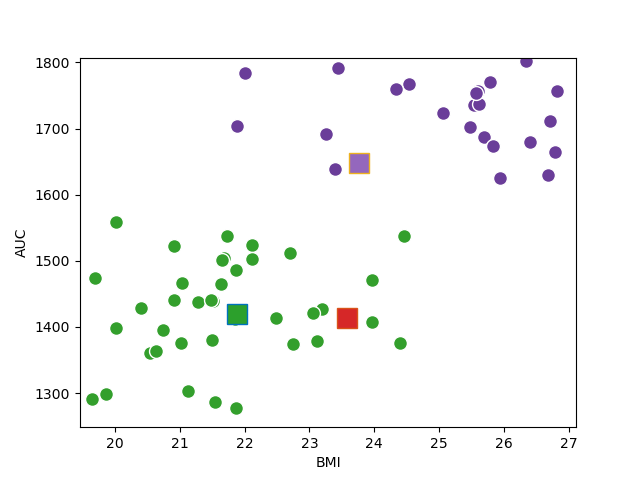

In [156]:
AUC = np.sum(profiles, axis=1)

plt.figure()
plt.gca().set_facecolor('w')
hC2 = plt.plot(BMI[Controls], AUC[Controls], 'o', markersize=10, markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP2 = plt.plot(BMI[Patients], AUC[Patients], 'o', markersize=10, markerfacecolor=plot_color[-1, :], markeredgecolor='w')
plt.xlabel('BMI')
plt.ylabel('AUC')

for i in range(len(sel)):
    plt.plot(BMI[sel[i]], AUC[sel[i]], 's', markersize=15, markeredgecolor=colorplot[i, :], linewidth=2.5)

plt.box(True)
#plt.legend([hC2[0], hP2[0]], ['Controls', 'Patients'], loc='northoutside', ncol=2, frameon=False)
plt.show()



**Step 13:** What do you notice about this graph now compared to the original graph? 

# Task 4


Now we have been able to show the distinct cluster of control participants and patients, it's time to test how confident we feel about our results with 2 unknown participants.

**Step 14:** We will run this next section of code to see what the new participants hormone profiles look like, and where they sit on the graph. In this task you need to load in the data file, and assign the correct columns to "New_BMI" and "New_profile" (hormone profile).

- Add in the data file for the new individuals "New_individuals [2].csv"
- Identify which column is BMI in "New_individuals [2].csv" (Remember, in Python the first number is always 0!)
- You want all rows in the BMI column. Can you remember how to write "all rows"?
- Add in the New_BMI values; New_BMI = New_individuals[ , ]

Then **Run this section of code...**

<IPython.core.display.Javascript object>


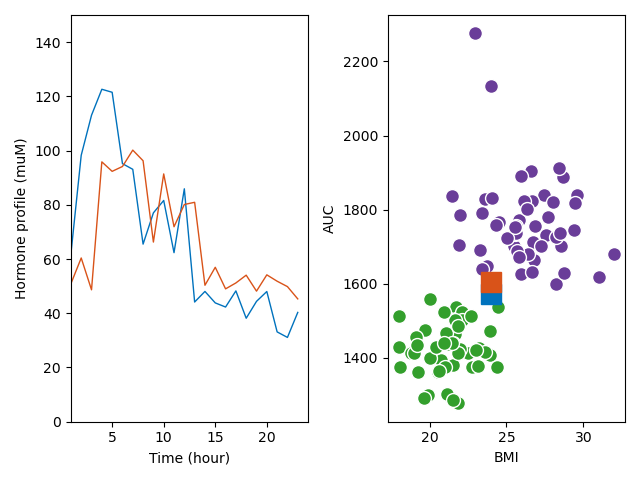

In [178]:

New_individuals = pd.read_csv('New_individuals [2].csv').to_numpy()

New_BMI = New_individuals[:, 5]
New_profile = New_individuals[:, 6:]
New_AUC = New_profile.sum(axis=1)

plt.figure()
plt.gcf().set_facecolor('w')

plt.subplot(1, 2, 1)
plt.plot(New_profile[0, :], linewidth=1, color=colorplot[0, :])
plt.plot(New_profile[1, :], linewidth=1, color=colorplot[1, :])
plt.xlim([1, 24])
plt.xlabel('Time (hour)')
plt.ylim([0, 150])
plt.ylabel('Hormone profile (muM)')
plt.box(True)

plt.subplot(1, 2, 2)
hC1 = plt.plot(BMI[Controls], AUC[Controls], 'o', markersize=10, markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP1 = plt.plot(BMI[Patients], AUC[Patients], 'o', markersize=10, markerfacecolor=plot_color[-1, :], markeredgecolor='w')
plt.plot(New_BMI[0], New_AUC[0], 's', markersize=15, markerfacecolor=colorplot[0, :], markeredgecolor=colorplot[0, :], linewidth=2.5)
plt.plot(New_BMI[1], New_AUC[1], 's', markersize=15, markerfacecolor=colorplot[1, :], markeredgecolor=colorplot[1, :], linewidth=2.5)
plt.xlabel('BMI')
plt.ylabel('AUC')
plt.box(True)
plt.tight_layout()
plt.show()

**Step 15:** Look at the hormone profiles of the 2 new individuals, and where they sit on the graph. Would you confidently be able to say if one is a control participant or if one has disease? Discuss this with the class.

# Task 5

To help us have a definitive answer of whether these new individuals are either control or patient participants, we need a way to competely separate the two clusters...by drawing a line between the two that acts as a boundary. Anything above the line is patient, anything below the line is control.

But we cant just draw a line based on nothing. We can use a clever algorithm that draws a line based on the data, so we know the line is the most accurate and representative boundary based on our data.

This algorithm is called a **Support Vector Machine**

**Run the section of code below...**

<IPython.core.display.Javascript object>


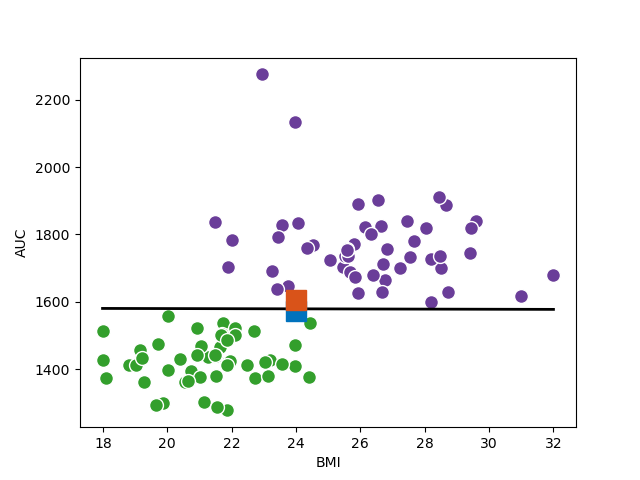

In [180]:
%matplotlib notebook
# Assuming BMI, AUC, condition, Controls, Patients, plot_color, New_BMI, New_AUC, colorplot are defined

# Fit SVM model
SVMModel = SVC(kernel='linear').fit(np.column_stack((BMI, AUC)), condition)
sv = SVMModel.support_vectors_
beta = SVMModel.coef_[0]
b = SVMModel.intercept_[0]

X1 = np.linspace(np.min(BMI), np.max(BMI), 100)
X2 = -(beta[0] / beta[1] * X1) - b / beta[1]

plt.figure()
plt.gca().set_facecolor('w')
hC4 = plt.plot(BMI[Controls], AUC[Controls], 'o', markersize=10, 
               markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP4 = plt.plot(BMI[Patients], AUC[Patients], 'o', markersize=10, 
               markerfacecolor=plot_color[-1, :], markeredgecolor='w')
plt.plot(X1, X2, '-', linewidth=2, color='k')
plt.plot(New_BMI[0], New_AUC[0], 's', markersize=15, 
         markerfacecolor=colorplot[0, :], markeredgecolor=colorplot[0, :], linewidth=2.5)
plt.plot(New_BMI[1], New_AUC[1], 's', markersize=15, 
         markerfacecolor=colorplot[1, :], markeredgecolor=colorplot[1, :], linewidth=2.5)

plt.xlabel('BMI')
plt.ylabel('AUC')
plt.box(True)

#plt.legend([hC4[0], hP4[0]], ['Controls', 'Patients'], 
 #          orientation='horizontal', frameon=False, loc='upper center')
plt.show()

**Step 16:** Now we have used the SVM algorithm to separate the clusters with a line, are you now able to confidently say wheteher these 2 individuals are a control participant or patient?